In [1]:
from sympy import *
from dtumathtools import *
init_printing()

x, k_s, phi, w, t, A = symbols('x k_s phi w t A', real=True)
delta = symbols('delta', real=True, positive=True)

# 1.2

In [2]:
k = k_s*(E**(I*delta)/cos(delta))
z = A*E**(I*(w*t+phi))
x = re(z)
F_FHM = re((-k*z).simplify())
F_FHM

-A⋅kₛ⋅cos(δ + φ + t⋅w) 
───────────────────────
         cos(δ)        

In [3]:
def F_func(ks, d):
    return F_FHM.subs({A: 1, phi:0, w:1, k_s:ks, delta: d})

# 1.3

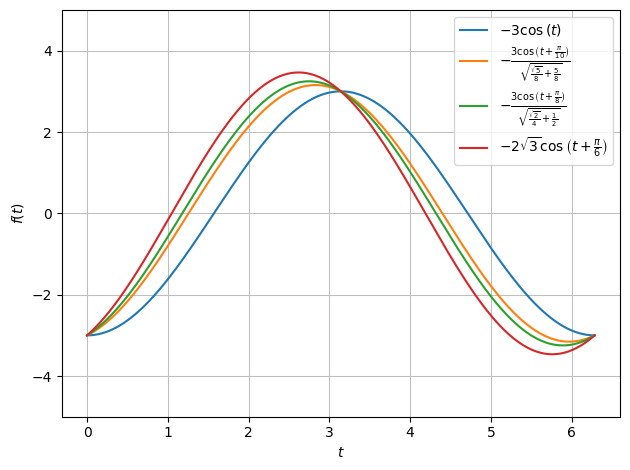

In [4]:
p1 = dtuplot.plot(F_func(3, 0), (t,0,2*pi), ylim = (-5,5), show=False)
p2 = dtuplot.plot(F_func(3, pi/10), (t,0,2*pi), ylim = (-5,5), show=False)
p3 = dtuplot.plot(F_func(3, pi/8), (t,0,2*pi), ylim = (-5,5), show=False)
p4 = dtuplot.plot(F_func(3, pi/6), (t,0,2*pi), ylim = (-5,5), show=False)
comb = p1+p2+p3+p4
comb.show()

In [5]:
fx = x.subs({A:1, phi:0, w:1})
fx

cos(t)

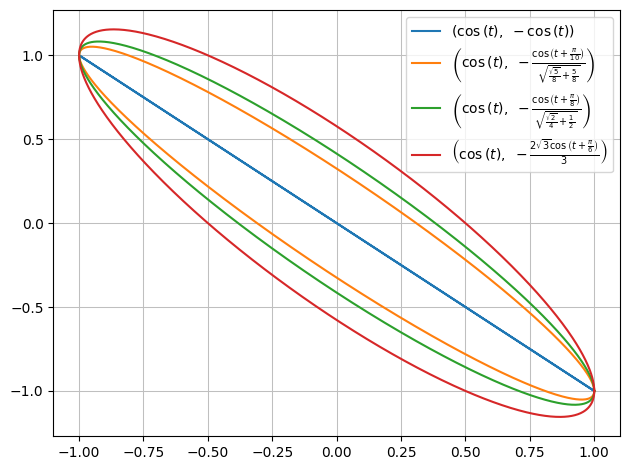

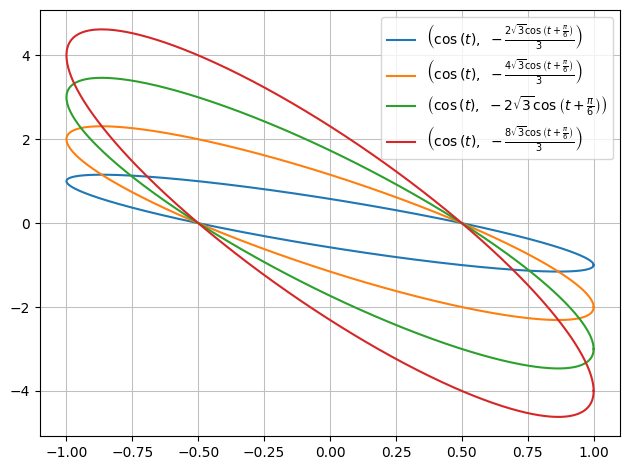

In [6]:
def plotkks(ks, d):
    comb = sum([dtuplot.plot_parametric(
        *Matrix([fx,F_func(ks, delta)]),
        (t,0,2*pi), use_cm=False, show=False) for delta in d])
    comb.show()

def plotkd(ks, d):
    comb = sum([dtuplot.plot_parametric(
        *Matrix([fx,F_func(ks_, d)]), 
        (t,0,2*pi), use_cm=False, show=False) for ks_ in ks])
    comb.show()

plotkks(1, [0, pi/10, pi/8, pi/6])
plotkd([1, 2, 3, 4], pi/6)

# 1.4

In [7]:
xd = diff(x,t)
inte = (F_FHM*xd).subs({A:1, phi:0, w:1, k_s: 1})
inte, inte.subs({delta:0})

⎛sin(t)⋅cos(δ + t)               ⎞
⎜─────────────────, sin(t)⋅cos(t)⎟
⎝      cos(δ)                    ⎠

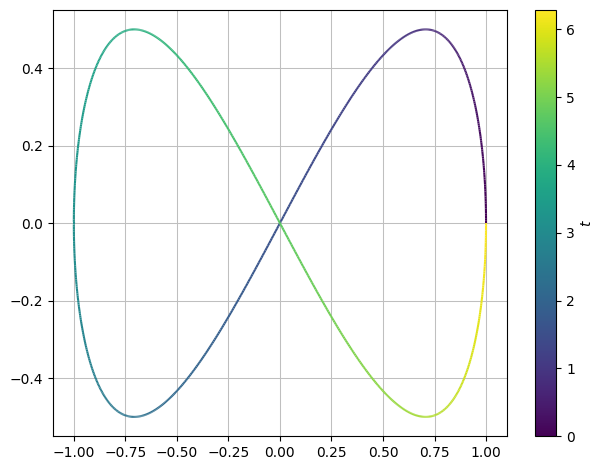

In [8]:
dtuplot.plot_parametric(*Matrix([fx,inte.subs({delta:0})]), (t,0,2*pi))

In [9]:
t1 = (t, 0, 2*pi)

In [10]:
E1 = integrate(inte, t1)
E1

-π⋅sin(δ) 
──────────
  cos(δ)  

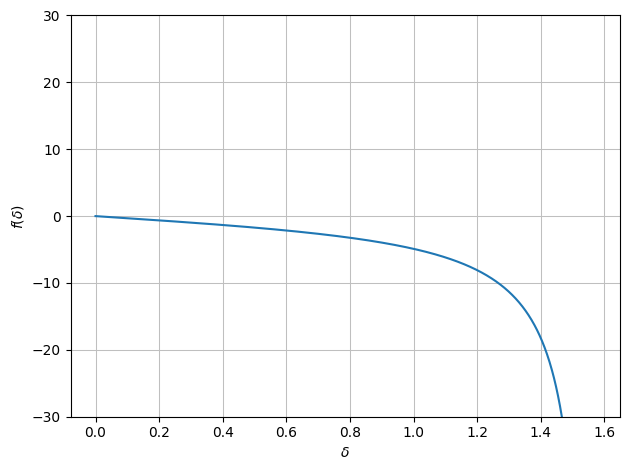

In [11]:
dtuplot.plot(E1, (delta, 0, pi/2), ylim = (-30,30))

# Andre måder at få FFHM på med andre simplify metoder

In [12]:
k = k_s*(1 + tan(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
aws = re((-k*z).simplify())
aws

A⋅kₛ⋅sin(φ + t⋅w)⋅tan(δ) - A⋅kₛ⋅cos(φ + t⋅w)

In [13]:
from sympy.simplify.fu import *
TR2(aws)

A⋅kₛ⋅sin(δ)⋅sin(φ + t⋅w)                    
──────────────────────── - A⋅kₛ⋅cos(φ + t⋅w)
         cos(δ)                             

In [14]:
k = k_s*(1 + sin(delta)/cos(delta)*I)
z = A*(cos(w*t+phi)+I*sin(w*t+phi))
aws = re((-k*z).simplify())
aws

-A⋅kₛ⋅cos(δ + φ + t⋅w) 
───────────────────────
         cos(δ)        

In [15]:
TR8(-k*z), re(TR8(-k*z))

⎛A⋅kₛ⋅(-ⅈ⋅sin(δ + φ + t⋅w) - cos(δ + φ + t⋅w))  -A⋅kₛ⋅cos(δ + φ + t⋅w) ⎞
⎜─────────────────────────────────────────────, ───────────────────────⎟
⎝                    cos(δ)                              cos(δ)        ⎠

In [16]:
m, k_s, d = symbols('m k_s d', real=True, positive=True) 
la, c = symbols('lambda c')

In [17]:
k = k_s*(1+tan(delta)*I)
z = c*E**(la * t)
la_sol = solve(Eq(m * z.diff(t,2) + k * z, 0), [la])
la_sol

⎡   ____   _______________     ____   _______________⎤
⎢-╲╱ kₛ ⋅╲╱ -ⅈ⋅tan(δ) - 1    ╲╱ kₛ ⋅╲╱ -ⅈ⋅tan(δ) - 1 ⎥
⎢──────────────────────────, ────────────────────────⎥
⎣            √m                         √m           ⎦

In [18]:
la2_sol = solve(Eq(m * z.diff(t,2) + k * z, 0),la**2)[0]
la2_sol

-kₛ⋅(ⅈ⋅tan(δ) + 1) 
───────────────────
         m         

In [19]:
r, th = symbols('r theta', real=True)
la1 = r*(cos(th) + I * sin(th))

In [20]:
l1re, l1im = re(la1**2).simplify(), im(la1**2).simplify()
l1re, l1im

⎛ 2            2         ⎞
⎝r ⋅cos(2⋅θ), r ⋅sin(2⋅θ)⎠

In [21]:
l2re, l2im = re(la2_sol), im(la2_sol)
l2re, l2im

⎛-kₛ   -kₛ⋅tan(δ) ⎞
⎜────, ───────────⎟
⎝ m         m     ⎠

In [22]:
eq1, eq2 = Eq(l1re, l2re), Eq(l1im, l2im)
eq1, eq2

⎛ 2            -kₛ    2            -kₛ⋅tan(δ) ⎞
⎜r ⋅cos(2⋅θ) = ────, r ⋅sin(2⋅θ) = ───────────⎟
⎝               m                       m     ⎠

In [23]:
eq3 = Eq(eq1.lhs**2 + eq2.lhs**2 , eq1.rhs**2 + eq2.rhs**2)
eq3

                                2    2        2
 4    2         4    2        kₛ ⋅tan (δ)   kₛ 
r ⋅sin (2⋅θ) + r ⋅cos (2⋅θ) = ─────────── + ───
                                    2         2
                                   m         m 

In [24]:
r2 = sqrt(k_s / (m * cos(delta)))
r2

           ________
  ____    ╱   1    
╲╱ kₛ ⋅  ╱  ────── 
       ╲╱   cos(δ) 
───────────────────
         √m        

In [25]:
eq1.subs(r, r2), eq2.subs(r, r2)

⎛kₛ⋅cos(2⋅θ)   -kₛ   kₛ⋅sin(2⋅θ)   -kₛ⋅tan(δ) ⎞
⎜─────────── = ────, ─────────── = ───────────⎟
⎝  m⋅cos(δ)     m      m⋅cos(δ)         m     ⎠

In [26]:
eq4 = Eq(tan(2*th),tan(delta))
eq4

tan(2⋅θ) = tan(δ)

In [27]:
solve(eq4, th)

⎡atan(tan(δ))⎤
⎢────────────⎥
⎣     2      ⎦

In [161]:
x(0)

a

In [167]:
dm, al, be = symbols('delta_m a b', real=True, positive=True)
A_0 = symbols('A_0', real=True)

z = (al + be*I) * exp(r*(cos(delta/2 + pi/2)+sin(delta/2 + pi/2)*I)*t)
x = Lambda(t, re(z))
xd= Lambda(t, diff(x(t), t))

eq1 = Eq(x(0), A_0)
eq2 = Eq(xd(0), 0)

In [168]:
xbet_sol = solve([eq1, eq2], [al, be])
k = k_s*(1 + sin(delta) / cos(delta)*I)

F_FHM = Lambda(t, simplify(re(-k*z)))
F_FHM_bet = Lambda(t, simplify(F_FHM(t).subs(xbet_sol)))
x_bet = Lambda(t, simplify(x(t).subs(xbet_sol)))

print("z, x")
display(z, x(t))
print("\nF_FHM, F_FHM,bet, x_betinget")
display(F_FHM(t), F_FHM_bet(t), x_bet(t))
# plot(x_bet.subs({A_0:2, r: sqrt(2/(3*cos(pi/4))), delta:pi/4}), (t,0,20));

z, x


               ⎛     ⎛δ⎞        ⎛δ⎞⎞
           r⋅t⋅⎜- sin⎜─⎟ + ⅈ⋅cos⎜─⎟⎟
               ⎝     ⎝2⎠        ⎝2⎠⎠
(a + ⅈ⋅b)⋅ℯ                         

           ⎛δ⎞                              ⎛δ⎞                
   -r⋅t⋅sin⎜─⎟                      -r⋅t⋅sin⎜─⎟                
           ⎝2⎠    ⎛       ⎛δ⎞⎞              ⎝2⎠    ⎛       ⎛δ⎞⎞
a⋅ℯ           ⋅cos⎜r⋅t⋅cos⎜─⎟⎟ - b⋅ℯ           ⋅sin⎜r⋅t⋅cos⎜─⎟⎟
                  ⎝       ⎝2⎠⎠                     ⎝       ⎝2⎠⎠


F_FHM, F_FHM,bet, x_betinget


                                                              ⎛δ⎞
                                                      -r⋅t⋅sin⎜─⎟
   ⎛       ⎛           ⎛δ⎞⎞        ⎛           ⎛δ⎞⎞⎞          ⎝2⎠
kₛ⋅⎜- a⋅cos⎜δ + r⋅t⋅cos⎜─⎟⎟ + b⋅sin⎜δ + r⋅t⋅cos⎜─⎟⎟⎟⋅ℯ           
   ⎝       ⎝           ⎝2⎠⎠        ⎝           ⎝2⎠⎠⎠             
─────────────────────────────────────────────────────────────────
                              cos(δ)                             

                ⎛δ⎞                     
        -r⋅t⋅sin⎜─⎟                     
                ⎝2⎠    ⎛δ          ⎛δ⎞⎞ 
-A₀⋅kₛ⋅ℯ           ⋅cos⎜─ + r⋅t⋅cos⎜─⎟⎟ 
                       ⎝2          ⎝2⎠⎠ 
────────────────────────────────────────
                ⎛δ⎞                     
             cos⎜─⎟⋅cos(δ)              
                ⎝2⎠                     

            ⎛δ⎞                    
    -r⋅t⋅sin⎜─⎟                    
            ⎝2⎠    ⎛δ          ⎛δ⎞⎞
A₀⋅ℯ           ⋅cos⎜─ - r⋅t⋅cos⎜─⎟⎟
                   ⎝2          ⎝2⎠⎠
───────────────────────────────────
                  ⎛δ⎞              
               cos⎜─⎟              
                  ⎝2⎠              

In [120]:
# v1, v2 = symbols('v1 v2', real=True)
# k1 = x_sim.subs({r*cos(delta/2): v1, r*sin(delta/2): v2})
# k2 = F_FHM.subs({r*cos(delta/2): v1, r*sin(delta/2): v2})

# xdd = k1.diff(t,2).subs({v1:r*cos(delta/2), v2:r*sin(delta/2)}).simplify().subs({r*cos(delta/2): v1, r*sin(delta/2): v2}).simplify()
# lig1 = m * xdd.subs({r: sqrt(k_s/(m*cos(delta)))})
# lig2 = k2
# lig1, lig2, lig1-lig2

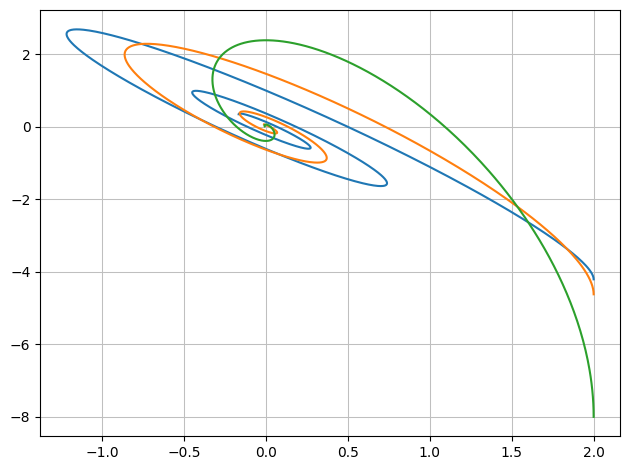

In [173]:
mf = Lambda((A_0, k_s, m, delta), Matrix([x_bet(t), F_FHM_bet(t)]).subs(r, sqrt(k_s/m  * cos(delta))))

combi = sum([
        dtuplot.plot_parametric(
        *mf(2, 2, 3, delta_), (t,0,20), 
        show=False, use_cm=False) 
    for delta_ in [pi/10, pi/6, pi/3]])
    
combi.legend = False
combi.show()

In [46]:
# plot real spring mass system
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib qt
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-2, 5)
ax.set_ylim(-1, 6)
ax.set_aspect('equal')

x1, y1 = mf(2, 2, 3, pi/10)[0], mf(2, 2, 3, pi/10)[1]
x2, y2 = mf(2, 2, 3, pi/6)[0], mf(2, 2, 3, pi/6)[1]
x3, y3 = mf(2, 2, 3, pi/3)[0], mf(2, 2, 3, pi/3)[1]

# lambdify the function
t_vals = np.linspace(0, 20, 1000)

x1f, x2f, x3f = lambdify(t, x1, 'numpy'), lambdify(t, x2, 'numpy'), lambdify(t, x3, 'numpy')
y1f, y2f, y3f = lambdify(t, y1, 'numpy'), lambdify(t, y2, 'numpy'), lambdify(t, y3, 'numpy')

x1_vals, x2_vals, x3_vals = x1f(t_vals), x2f(t_vals), x3f(t_vals)
y1_vals, y2_vals, y3_vals = y1f(t_vals), y2f(t_vals), y3f(t_vals)

# Define the square mass
mass1 = plt.Rectangle((0, 0), 1, 1, fc='blue')
arrow1 = plt.Rectangle((0.5, 0.45), 0, 0.1, fc='red')
spring1 = plt.Rectangle((-2, 0.45), 0, 0.1, fc='green')
text1 = ax.text(3, 0.5, 'd = pi/10', fontsize=10)
ax.add_patch(mass1)
ax.add_patch(arrow1)
ax.add_patch(spring1)

mass2 = plt.Rectangle((0, 2), 1, 1, fc='blue')
arrow2 = plt.Rectangle((0.5, 2.45), 0, 0.1, fc='red')
spring2 = plt.Rectangle((-2, 2.45), 0, 0.1, fc='green')
text2 = ax.text(3, 2.5, 'd = pi/6', fontsize=10)
ax.add_patch(mass2)
ax.add_patch(arrow2)
ax.add_patch(spring2)

mass3 = plt.Rectangle((0, 4), 1, 1, fc='blue')
arrow3 = plt.Rectangle((0.5, 4.45), 0, 0.1, fc='red')
spring3 = plt.Rectangle((-2, 4.45), 0, 0.1, fc='green')
text3 = ax.text(3, 4.5, 'd = pi/3', fontsize=10)
ax.add_patch(mass3)
ax.add_patch(arrow3)
ax.add_patch(spring3)

# Define the update function for the animation
def update(t):
    # Update the position of the square mass
    mass1.set_xy((x1_vals[t], 0))
    arrow1.set_xy((x1_vals[t]+0.5, 1))
    arrow1.set_width(y1_vals[t])
    spring1.set_width(x1_vals[t]+2)
    
    mass2.set_xy((x2_vals[t], 2))
    arrow2.set_xy((x2_vals[t]+0.5, 3))
    arrow2.set_width(y2_vals[t])
    spring2.set_width(x2_vals[t]+2)
    
    mass3.set_xy((x3_vals[t], 4))
    arrow3.set_xy((x3_vals[t]+0.5, 5))
    arrow3.set_width(y3_vals[t])
    spring3.set_width(x3_vals[t]+2)
    
    return

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=len(t_vals), interval=1)

# Show the animation
plt.show()

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [47]:
from spb import *
A0, ks, m_, delta_ = symbols('A0 ks m d')
dtuplot.plot_parametric(*mf(A0, ks, m_, delta_), 
                        (t,0,20), backend=PB, use_cm=False,
                        params={delta_:(pi/10,0,pi/2), A0:(2,0,5), ks:(2,0,5), m_:(3,0,20)}) 